## Dealing with Imbalanced Class data

* Data with skewed class distributions
* Common examples are Spam/Ham mails or malicious/normal packets
* Classification algorithms tends to support data with heavier classes
* We can't trust accuracy; rather we got to use recall, precision, f1 score 

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

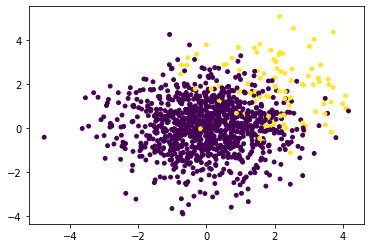

In [2]:
n_sample_01 = 1000
n_sample_02 = 100
centers = [[0.0, 0.0], [2, 2]]
cluster_std = 1.2

X, Y = make_blobs(n_samples=[n_sample_01, n_sample_02],
                  centers=centers,
                  cluster_std=cluster_std,
                  shuffle=True)

plt.scatter(X[:,0], X[:,1], s=15, c =Y)

In [3]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', degree=3, C=100)
svc.fit(X,Y)

SVC(C=100, kernel='poly')

In [4]:
h = 0.02
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [5]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\DEVVRAK\AppData\Local\Temp/ipykernel_11948/1608146242.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


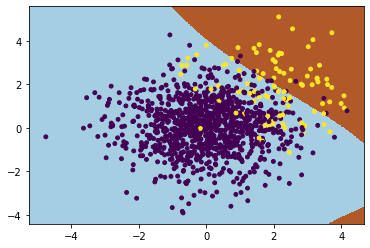

In [6]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=15)

In [7]:
# sklearn doesn't has any module to handle class imbalance
# But we can use imbalanced-learn

In [8]:
# ! pip install imbalanced-learn

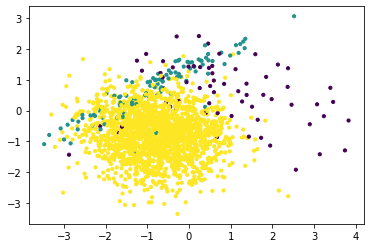

In [43]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_repeated=0,
                           n_classes=3, n_clusters_per_class=1, 
                           weights=[0.03, 0.05, 0.92], 
                           class_sep=0.8) 

plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [44]:
svc = SVC(C=100)
svc.fit(X,Y)

SVC(C=100)

C:\Users\DEVVRAK\AppData\Local\Temp/ipykernel_11948/3857714227.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


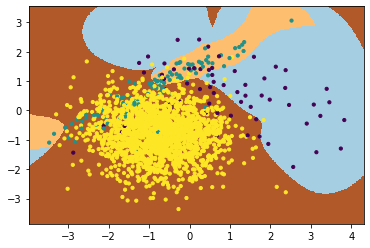

In [45]:
h = 0.02
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [47]:
pred= svc.predict(X)
print(confusion_matrix(Y, pred))

[[  32   10   23]
 [   1   46   56]
 [   5   11 1816]]


# Oversampling

* We try to increase the number of points from the minority classes only
* The simplest/naive stratergy would be to oversample the data randomly

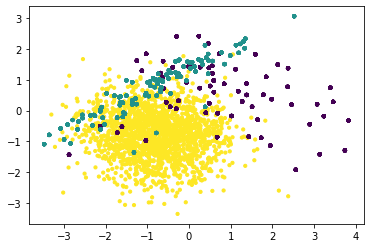

In [48]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_resampled, Y_resampled = ros.fit_resample(X, Y)
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=Y_resampled, s=10)

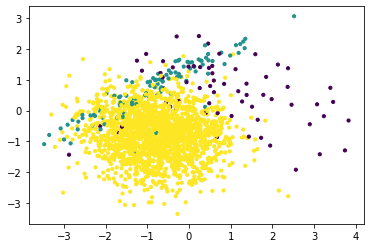

In [49]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [50]:
svc = SVC(C=100)
svc.fit(X_resampled,Y_resampled)

SVC(C=100)

C:\Users\DEVVRAK\AppData\Local\Temp/ipykernel_11948/3857714227.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


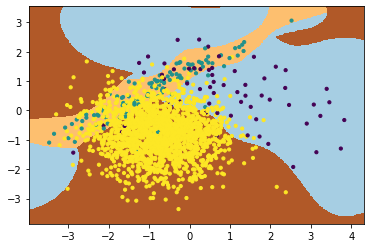

In [51]:
h = 0.02
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [52]:
pred= svc.predict(X)
print(confusion_matrix(Y, pred))

[[  49   10    6]
 [   5   96    2]
 [ 102  220 1510]]


In [53]:
from sklearn.metrics import recall_score, f1_score

print(recall_score(Y, pred, average='macro'))
print(f1_score(Y, pred, average='macro'))

0.8367069322192907
0.5974946329643432


## SMOTE - Synthetic Minority Oversampling Technique

* Generates new data using interpolation
* It doesn't duplicates data

In [54]:
from imblearn.over_sampling import SMOTE

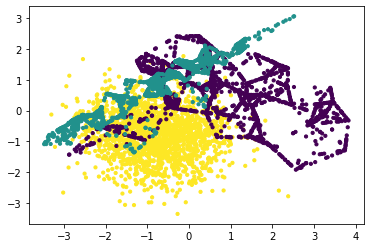

In [55]:
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=Y_resampled, s=10)

In [56]:
svc.fit(X_resampled, Y_resampled)

SVC(C=100)

C:\Users\DEVVRAK\AppData\Local\Temp/ipykernel_11948/4070307721.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


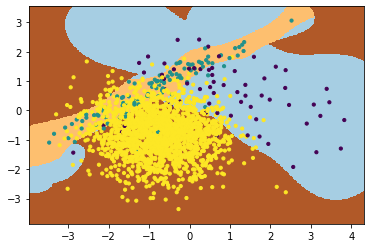

In [57]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [58]:
pred= svc.predict(X)
print(confusion_matrix(Y, pred))
print(recall_score(Y, pred, average='macro'))
print(f1_score(Y, pred, average='macro'))

[[  51    9    5]
 [   4   94    5]
 [ 112  198 1522]]
0.842674256679853
0.6032922852332796


## ADASYN - Adaptive SYnthetic Sampling methods

* Its similar to SMOTE but only generates the data in the area where it is miscalssified

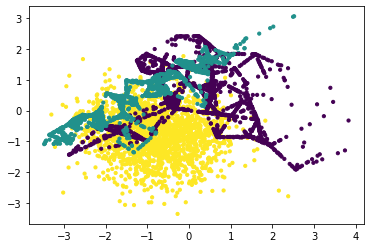

In [59]:
from imblearn.over_sampling import ADASYN
X_resampled, Y_resampled = ADASYN().fit_resample(X, Y)
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=Y_resampled, s=10)

C:\Users\DEVVRAK\AppData\Local\Temp/ipykernel_11948/2649859734.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


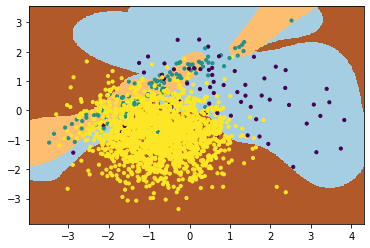

In [60]:
svc.fit(X_resampled, Y_resampled)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [61]:
pred= svc.predict(X)
print(confusion_matrix(Y, pred))
print(recall_score(Y, pred, average='macro'))
print(f1_score(Y, pred, average='macro'))

[[  57    6    2]
 [  15   85    3]
 [ 190  218 1424]]
0.8264861239296311
0.5448656483438911


# Undersampling

* Reducing the data of the over-represented class

## Random Undersampler:

Randomly selecting the data points from the majoirty class without replacement

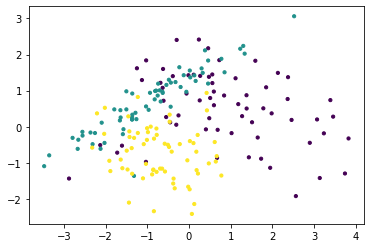

In [69]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, Y_resampled = RandomUnderSampler().fit_resample(X, Y)
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=Y_resampled, s=10)

C:\Users\DEVVRAK\AppData\Local\Temp/ipykernel_11948/2649859734.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


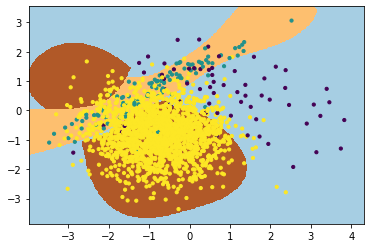

In [70]:
svc.fit(X_resampled, Y_resampled)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [71]:
pred= svc.predict(X)
print(confusion_matrix(Y, pred))
print(recall_score(Y, pred, average='macro'))
print(f1_score(Y, pred, average='macro'))

[[  46   13    6]
 [   4   96    3]
 [ 127  226 1479]]
0.8156818510413713
0.5698284363538156


## Cluster centroids for data generation: 

* Selects centroids using k-means and they usually are a better representative of data

In [72]:
from imblearn.under_sampling import ClusterCentroids

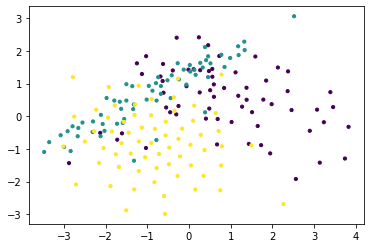

In [74]:
X_resampled, Y_resampled = ClusterCentroids().fit_resample(X, Y)
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=Y_resampled, s=10)

C:\Users\DEVVRAK\AppData\Local\Temp/ipykernel_11948/2649859734.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


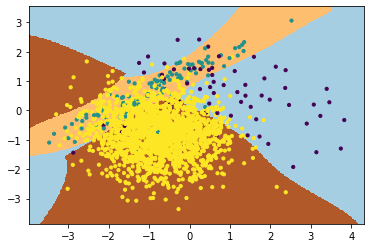

In [75]:
svc.fit(X_resampled, Y_resampled)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [76]:
pred= svc.predict(X)
print(confusion_matrix(Y, pred))
print(recall_score(Y, pred, average='macro'))
print(f1_score(Y, pred, average='macro'))

[[  44   13    8]
 [   1  100    2]
 [  74  256 1502]]
0.8225552863213439
0.6001050139920713


## Connecting Samplers to Pipelines

* We can try to put these samplers in a pipeline so that we can validate them
* Sklearn is not capable enough to deal with samplers and we use Pipelines from imblearn which override the sklearn pipeline

In [77]:
from imblearn.pipeline import make_pipeline

In [79]:
pipeline_01 = make_pipeline(RandomOverSampler(), SVC(C=100))
pipeline_02 = make_pipeline(RandomUnderSampler(), SVC(C=100))

pipelineList = [pipeline_01, pipeline_02]

In [80]:
for pipeline in pipelineList:
    pipeline.fit(X,Y)

In [82]:
for sampling, pipeline in zip(["OverSampler", "Undersampler"], pipelineList):
    pred = pipeline.predict(X)
    print(sampling, "\n", confusion_matrix(Y, pred))
    print(recall_score(Y, pred, average='macro'))
    print(f1_score(Y, pred, average='macro'))
    print("\n")

OverSampler 
 [[  50   11    4]
 [   5   95    3]
 [ 108  209 1515]]
0.8395086439401105
0.5988469574760885


Undersampler 
 [[  45   13    7]
 [   4   96    3]
 [  94  220 1518]]
0.8176497157821615
0.5935693935693935




## Making the Classification Algorithm aware of Data imbalance:

* Most of the classification algorithms povide a method to pass class distribution information
* Internally the algorithm uses this and configures itself for justifying under-represented class

In [83]:
svc = SVC(C=100)
svc.fit(X,Y)

SVC(C=100)

In [84]:
pred = svc.predict(X)
print(confusion_matrix(Y, pred))

[[  32   10   23]
 [   1   46   56]
 [   5   11 1816]]


In [85]:
svc = SVC(C=100, class_weight='balanced')
svc.fit(X,Y)

SVC(C=100, class_weight='balanced')

In [86]:
pred = svc.predict(X)
print(confusion_matrix(Y, pred))

[[  52   10    3]
 [   4   96    3]
 [ 116  216 1500]]


In [87]:
print(recall_score(Y, pred, average='macro'))

0.8502720425092919
